In [147]:
import create_instance
import step
import viewer
import regression
import importlib
importlib.reload(create_instance)
importlib.reload(regression)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'regression' from '/home/tanashou1/study_group/ahc003/regression.py'>

In [212]:
h, v = create_instance.random_create(10, 10)
sum_list, ct_list = step.get_n_step(100, h, v)
ans = create_instance.get_answer(h, v)
# viewer.visualize(h, v)

D = 100
M = 1


In [150]:
importlib.reload(regression)
_, acc = regression.bayesian(ct_list, sum_list, ans)

AttributeError: module 'pymc3' has no attribute 'Nomal'

In [151]:
import numpy as np
import pymc3 as pm

In [210]:
def dot(x_list, ct_list):
    in_list = []
    ct = np.array(ct_list).T

    for i, x in enumerate(x_list):
        in_list.append(x * ct[i])
    
    return sum(in_list)

def xdot(X, ct_list):
    in_list = []
    ct = np.array(ct_list).T

    for i in range(len(ct[0])):
        in_list.append(X[i] * ct[i])
    
    return sum(in_list)

def bayesian(ct_list, sum_list, ans):
    y = np.array(sum_list)
    # モデル
    with pm.Model() as model:
        # 1. 事前分布
        x_list = []
        for i, _ in enumerate(ct_list[0]):
            x = pm.Normal(f"x{i}", mu=5000., sd=10000.)
            # x = pm.Uniform(f"x{i}", lower=1000, upper=10000, testval=5000)
            x_list.append(x)
        # x_list = pm.Normal(f"x", mu=5000, sd=5000, shape=len(ct_list[0]))
        
        epsilon = pm.HalfNormal('epcilon', sd=10000)
        # 2. 尤度の計算
        m = dot(x_list, ct_list)
        print(m)
        y_pred = pm.Normal('y_pred', mu=m, sd=epsilon, observed=y)
        # 3. MCMCの実行
        trace = pm.sample(6000, chains=1)
    
    trace_n = trace[1000:]

    coefs = []
    for i, _ in enumerate(ans):
        coefs.append(trace_n[f"x{i}"].mean())

    err = sum([min(a, abs(v - a))/a for v, a in zip(coefs, ans)]) / len(ans)
    accuracy = 1. - err

    return coefs, accuracy


import random

# ans1 = [4000., 6000.]
ans1 = [-2000., 3000.]
# 
x = [
    [2., 3.], [5., 2.], [3., 2.],
    [2., 1.], [1., 5.], [1., 1.]
]
y = [xx[0] * ans1[0] * random.uniform(0.8, 1.2) +
     xx[1] * ans1[1] * random.uniform(0.8, 1.2)
     for xx in x]

print(x)
print(y)
# _, acc = bayesian(x, y, ans1)
_, acc = bayesian(ct_list, sum_list, ans)

[[2.0, 3.0], [5.0, 2.0], [3.0, 2.0], [2.0, 1.0], [1.0, 5.0], [1.0, 1.0]]
[3498.1318164981203, -3557.3714896360234, -179.04159982241708, -200.1135470130007, 16094.989407259014, 1078.2525873562547]
Elemwise{add,no_inplace}.0


<ipython-input-210-554d9b401fc9>:37: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(6000, chains=1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [epcilon, x6, x5, x4, x3, x2, x1, x0]


Sampling 1 chain for 1_000 tune and 6_000 draw iterations (1_000 + 6_000 draws total) took 26 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [211]:
acc

0.9742546534385352

In [144]:
acc_list = []
for n in range(1, len(sum_list)):
    _, acc = regression.linear(ct_list[:n], sum_list[:n], ans)
    acc_list.append(acc)

In [145]:
acc_list2_with_line = []
for n in range(1, len(sum_list)):
    _, acc = regression.linear_with_line(ct_list[:n], sum_list[:n], ans, h, v)
    acc_list2_with_line.append(acc)

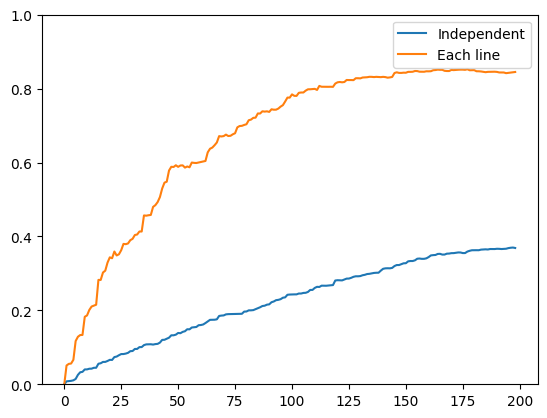

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.lineplot(x=None, y=acc_list)
plt.plot(acc_list)
plt.plot(acc_list2_with_line)
plt.legend(["Independent", "Each line"])
plt.ylim(0,1)
plt.show()